In [2]:
import gspread
from oauth2client.service_account import ServiceAccountCredentials

In [3]:
JSONFILE = "secreat.json"
SPREAD_SHEET_KEY = "1-NrRiDIs4i-I-Xl9QAvuTzoxLmZxLAsZ3YvrUcSDtnM"

def connect_gspread(jsonfile, key):
    try:
        scope = ['https://spreadsheets.google.com/feeds',
                 'https://www.googleapis.com/auth/drive']
        credentials = ServiceAccountCredentials.from_json_keyfile_name(
            jsonfile, scope)
        gc = gspread.authorize(credentials)
        SPREADSHEET_KEY = key
        ws = gc.open_by_key(SPREADSHEET_KEY).sheet1
        return ws
    except Exception as e:
        print(e)



In [18]:
import pandas as pd

COL_TIMESTAMP = "タイムスタンプ"
COL_MAIL = "メールアドレス"
COL_PHYSIC_PLUS = "身体の調子はいいですか?"
COL_PHYSIC_MINUS = "身体の調子は悪いですか?"
COL_MENTAL_PLUS = "気分は良いですか?"
COL_MENTAL_MINUS = "気分は悪いですか?"

ws= connect_gspread(JSONFILE, SPREAD_SHEET_KEY)
df = pd.DataFrame(ws.get_all_records())
# タイムスタンプをdatetime型に変換
df[COL_TIMESTAMP] = pd.to_datetime(df[COL_TIMESTAMP])
#　スコアをnumeric型へ変換
targe_cols = [COL_PHYSIC_PLUS,COL_PHYSIC_MINUS,COL_MENTAL_PLUS,COL_MENTAL_MINUS]
for col in targe_cols:
    df[col] = pd.to_numeric(df[col])
    
# グラフ用のcolum追加
df['physical'] = df[COL_PHYSIC_PLUS] - df[COL_PHYSIC_MINUS]
df['mental'] = df[COL_MENTAL_PLUS] - df[COL_MENTAL_MINUS]

# 不要colum削除
df.drop(targe_cols, axis=1,inplace=True)
df

,タイムスタンプ,メールアドレス,physical,mental
0,2021-03-21 21:48:36,p05mq11@gmail.com,0,4
1,2021-03-22 11:22:41,p05mq11@gmail.com,6,1
2,2021-03-22 12:03:46,fenderst0612@gmail.com,-1,-2
3,2021-03-23 10:27:55,p05mq11@gmail.com,4,6
4,2021-03-23 16:48:17,fenderst0612@gmail.com,3,5
5,2021-03-24 10:35:05,p05mq11@gmail.com,6,5
6,2021-03-24 10:39:55,fenderst0612@gmail.com,8,9
7,2021-03-25 11:58:31,p05mq11@gmail.com,7,1
8,2021-03-25 12:25:57,fenderst0612@gmail.com,9,5
9,2021-03-26 12:14:21,fenderst0612@gmail.com,7,5


created chart about p05mq11@gmail.com
created chart about fenderst0612@gmail.com


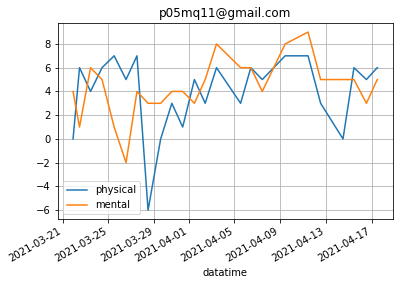

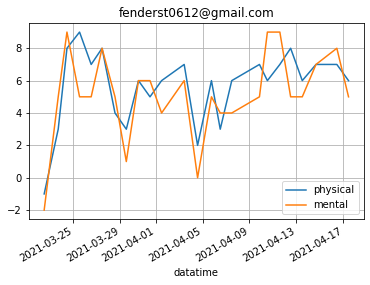

In [38]:
import matplotlib.pyplot as plt

users = list(df[COL_MAIL].drop_duplicates())
for user in users:
    df_for_user= df[df[COL_MAIL] == user].rename(columns={COL_TIMESTAMP:'datatime'})
#     plt.figure()
    df_for_user.plot.line(title=user,x='datatime',grid=True)
#     plt.savefig(f'charts/{user}.png')
#     plt.close('all')
    print(f'created chart about {user}')
